In [ ]:
# import Libraries

import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dense  , Flatten
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt

# 1. Data Jar

In [ ]:
# loading the training data and testing data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# ckeck the shapes of the datasets
print("shape of Train Features : " , x_train.shape)
print("shape of Test Features : " , x_test.shape)
print("shape of Train Labels : " , y_train.shape)
print("shape of Test Labels : " , y_test.shape)

shape of Train Features :  (60000, 28, 28)
shape of Test Features :  (10000, 28, 28)
shape of Train Labels :  (60000,)
shape of Test Labels :  (10000,)


In [ ]:
# we scale the images. The pixel values are ranging from 0-255. By dividing with 255 the values will change to range 0 to 1

x_train = x_train / 255.0
x_test = x_test / 255.0

Plotting the first 9 training images:


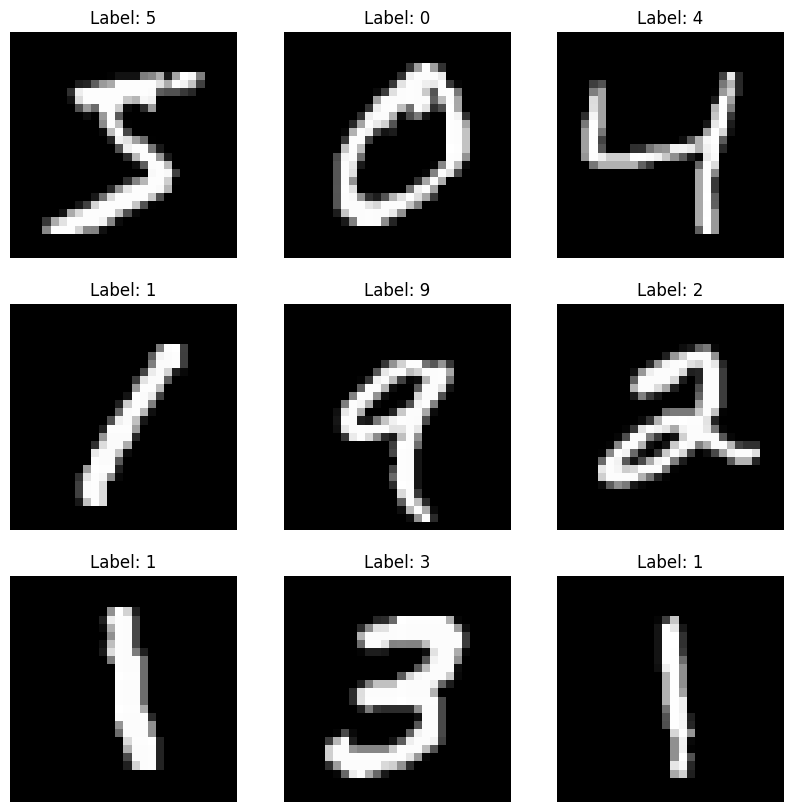

In [ ]:
# Inspecting the Hand Written Images


print("Plotting the first 9 training images:")
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()




# 2. Task Jar


Here the task is to Classify the hand written digits.There are total of 10 classes , digits ranging from 0 to 9



# 3. Model Jar , Loss Jar , Learning Jar

In [ ]:
# Sequential Layer will send the output of previous layer to the present layer

model = Sequential([
    Flatten(),
    Dense(128 , activation = 'relu'),
    Dense(10 , activation = 'softmax')
])

# compile method is used to set the optimizers and loss that we use for this model. Here we are the accuracy metric with 10 class labels
model.compile(optimizer = 'sgd' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'] )


# Actual training of the model will happen here
history = model.fit(x_train , y_train , epochs = 2 , batch_size = 64 )

Epoch 1/2
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6622 - loss: 1.2897
Epoch 2/2
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8857 - loss: 0.4392


# 4. Accuracy Jar

In [ ]:
# evaluating the model with model.evaluate()
# if we want to get the accuracy using the evaluate model , the metric has to be specified in the compile function


loss , acc = model.evaluate(x_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8885 - loss: 0.4078


In [ ]:
print("test loss : " , loss)
print("test accuracy : " , acc*100)

test loss :  0.3538191020488739
test accuracy :  90.53000211715698


## Pickling the Model

In [ ]:
# Lets show the number of training parameters in the model

new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,772 (397.55 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# lets store the model using the pickle module. we store the model using the dump method.

import pickle

with open("mnist.pkl" , "wb") as file:
  pickle.dump(model , file)

In [ ]:
#loading the pickle file

with open("mnist.pkl" , "rb") as file:
  loaded_model = pickle.load(file)

In [ ]:
#checking the loaded model

loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,772 (397.55 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# checking the accuracy of the test data using the loaded model

testloss , testacc = loaded_model.evaluate(x_test , y_test)

print("test loss : " , testloss)
print("test accuracy : " , testacc*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8885 - loss: 0.4078
test loss :  0.3538191020488739
test accuracy :  90.53000211715698
